In [1]:
import time
from PIL import ImageGrab, ImageEnhance, ImageOps
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

## Take a screenshot of the Action House

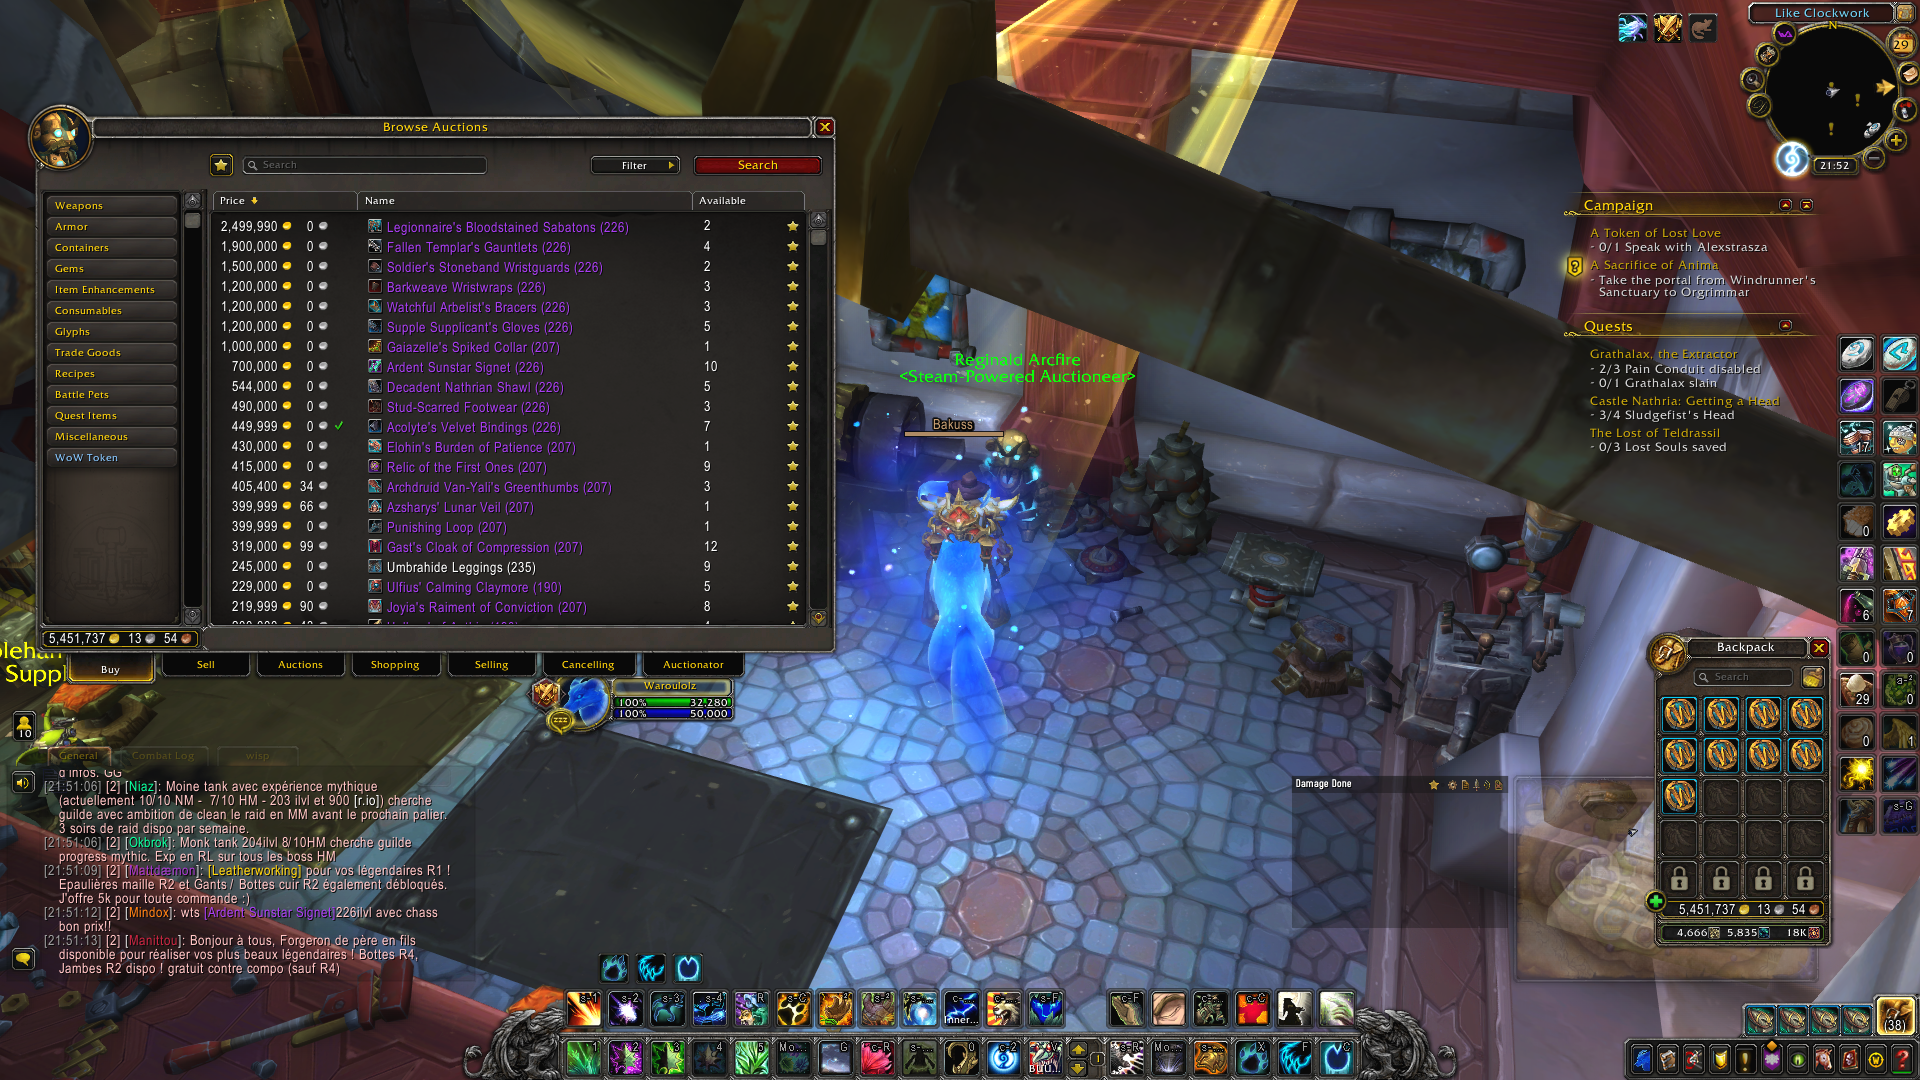

In [2]:
img = ImageGrab.grab()
display(img)

## Cut the image to the items zone

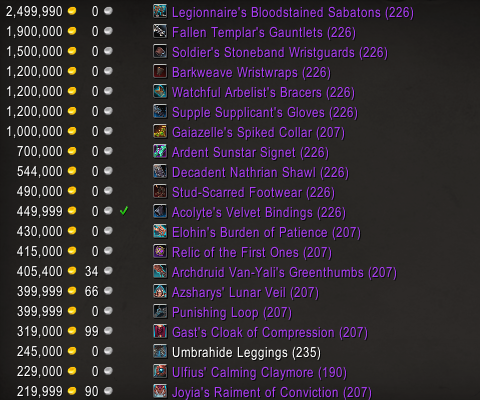

In [3]:
img = img.crop((215, 215, 695, 615))
display(img)

## Get the height size of each item to split the image vertically

In [4]:
nb_items = 20
width, height = img.size
item_height = int(height/nb_items)

## Loop through all split up lines and crop the images of prices and item names

In [5]:
#for item_offset in range(0, height, item_height):

item_offset = 0

display(img.crop((0, item_offset, width, item_offset + item_height)))

priceImg = ImageOps.invert(img.crop((0, item_offset, 66, item_offset + item_height)))
display(priceImg)

nameImg = img.crop((170, item_offset, width, item_offset + item_height))
nameImgBW = nameImg.convert('L').point(lambda x : 255 if x > 46 else 0, mode='1')
display(nameImgBW)

## Use OCR on the name image

In [6]:
imgdata = pytesseract.image_to_data(nameImgBW, config= r'--oem 1 --psm 6', lang="eng", output_type=pytesseract.Output.DICT)
name = ' '.join([x for i,x in enumerate(imgdata['text']) if int(imgdata['conf'][i]) >= 30])
name

'Legionnaire’s Bloodstained Sabatons (226)'

## Use OCR on the price image

In [7]:
imgdata = pytesseract.image_to_data(priceImg, lang='eng', config=r'--oem 3 --psm 10 -c tessedit_char_whitelist=0123456789', output_type=pytesseract.Output.DICT)
price = ' '.join([x for i,x in enumerate(imgdata['text']) if int(imgdata['conf'][i]) >= 0])
price

'2499990'

## Compare to wishlist and determine if it's a good buy

In [8]:
wishList = {
    "Watchful Arbelist's Bracers" : 10000000,
    "Legionnaire’s Bloodstained Sabatons" : 5000000,
    "Soldier's Stoneband Wristguards" : 500000,
    "Supple Supplicant's Gloves" : 500000,
    "Fallen Templar's Gauntlets" : 500000,
    "Acolyte’s Velvet Bindings" : 500000,
    "Barkweave Wristwraps" : 500000,
    "Decadent Nathrian Shawl" : 500000,
    "Stud-Scarred Footwear" : 500000,
    "Relic of the First Ones" : 200000,
    "Gast's Cloak of Compression" : 200000,
    "Punishing Loop" : 500000,
    "Elohin’s Burden of Patience" : 200000,
    "Azeharys' Lunar Vell" : 200000,
    "Gaiazelle's Spiked Collar" : 200000
           }

In [9]:
from winsound import Beep
def ring_alarm():
    Beep(300, 100)
    Beep(600, 500)
    Beep(500, 100)
    
if wishList[name.split(' (')[0]] >= int(price):
    print('Go buy {} !!!'.format(name))
    ring_alarm()

Go buy Legionnaire’s Bloodstained Sabatons (226) !!!


## Refresh Auction House

In [ ]:
import win32api, win32con
def clickRefresh():
    x, y = 220, 165
    win32api.SetCursorPos((x,y))
    win32api.mouse_event(win32con.MOUSEEVENTF_LEFTDOWN,x,y,0,0)
    win32api.mouse_event(win32con.MOUSEEVENTF_LEFTUP,x,y,0,0)

clickRefresh()